In [ ]:
import pandas as pd
data = pd.read_csv("data train and test hashtag.csv")
data.head(2)
data = data.drop(["Unnamed: 0"], axis = 1)
data = data.dropna()
data.isna().sum()
from collections import Counter

topic_counts = Counter(data['Topic'])
sorted_topics = sorted(topic_counts, key=topic_counts.get, reverse=True)
label_mapping = {topic: i for i, topic in enumerate(sorted_topics)}
data['Label'] = data['Topic'].map(label_mapping)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:

# Xử lý dữ liệu
X = data["Descr"]  # Mô tả làm đặc trưng đầu vào
y = data["Label"]  # Nhãn là nhãn đầu ra

# Chuyển đổi nhãn thành dạng nhãn nhị phân
mlb = MultiLabelBinarizer(classes=np.arange(31))
y_binary = mlb.fit_transform([[label] for label in y])

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Tokenize và chuyển đổi văn bản thành sequences
max_words = 1000  # Số lượng từ tối đa trong từ điển
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences để có cùng độ dài
max_len = 100  # Độ dài tối đa của mỗi mô tả
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Xây dựng và huấn luyện mô hình MLP cho mỗi nhãn (giống như trong ví dụ trước)
# ...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [31] will be ignored
  warnings.warn(


In [ ]:
import numpy as np

# Tính số lượng nhãn duy nhất trong cột label
num_labels = len(data['Label'].unique())

# Tạo một array numpy với kích thước (số dòng, số lượng nhãn duy nhất)
one_hot_labels = np.zeros((len(data), num_labels))

# Đánh dấu những dòng tương ứng với nhãn của nó
for i, label in enumerate(data['Label']):
    one_hot_labels[i][label] = 1

# Thêm array one-hot vào DataFrame
data['one_hot_label'] = list(one_hot_labels)

# In ra DataFrame sau khi thêm cột one-hot
data.head()


,Title,Description,Topic,Descr,Label,one_hot_label
0,The Devil's Disciple,Set in Colonial America during the Revolutiona...,Fiction,set colonial america revolutionary era play te...,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Taking Chances,Spice-o-meter Rating: This fun romance is a so...,Romance,spiceometer rating fun romance solid maybe sca...,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Verdi : The Story of the Little Boy who Loved ...,This time Tapper moves his focus to Italy in h...,Biography & Autobiography,time tapper moves focus italy voyage among gre...,3,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Success,The contents of this volume originally appeare...,Business,contents volume originally appeared weekly art...,20,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Triplanetary,"ONE MAN DISCOVERED THE TRUTH—The Fall of Rome,...",Fiction,one man discovered truththe fall rome wars rac...,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
data

,Title,Description,Topic,Descr,Label
0,The Devil's Disciple,Set in Colonial America during the Revolutiona...,Fiction,set colonial america revolutionary era play te...,0
1,Taking Chances,Spice-o-meter Rating: This fun romance is a so...,Romance,spiceometer rating fun romance solid maybe sca...,10
2,Verdi : The Story of the Little Boy who Loved ...,This time Tapper moves his focus to Italy in h...,Biography & Autobiography,time tapper moves focus italy voyage among gre...,3
3,Success,The contents of this volume originally appeare...,Business,contents volume originally appeared weekly art...,20
4,Triplanetary,"ONE MAN DISCOVERED THE TRUTH—The Fall of Rome,...",Fiction,one man discovered truththe fall rome wars rac...,0
...,...,...,...,...,...
18095,Journey to the East,This book tells the tale of a man who goes on ...,other_1,book tells tale man goes wonderful amazing jou...,1
18096,The Monk Who Sold His Ferrari: A Fable About F...,"Wisdom to Create a Life of Passion, Purpose, a...",Biography & Autobiography,wisdom create life passion purpose peace inspi...,3
18097,I Am that,This collection of the timeless teachings of o...,Philosophy,collection timeless teachings one greatest sag...,9
18098,The Berlin Phenomenology,Since the three volume edition ofHegel's Philo...,History,since three volume edition ofhegels philosophy...,6


# Model nối tiếp

In [ ]:
# models = []
# for i in range(31):
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Embedding(max_words, 64, input_length=max_len),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dense(64, activation='relu'),
#         tf.keras.layers.Dense(32, activation='relu'),
#         tf.keras.layers.Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer='adam',
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])

#     X_train_label_i = X_train_pad[y_train[:, i] == 1]
#     y_train_label_i = y_train[y_train[:, i] == 1][:, i]
#     X_train_non_label_i = X_train_pad[y_train[:, i] == 0]

#     if i == 0:
#         # Train model 0
#         model.fit(X_train_label_i, np.ones_like(y_train_label_i), epochs=10, batch_size=32, verbose=0)
#         models.append(model)
#     else:
#         # Train model i based on the instances where model 0 predicts non-label 0
#         non_label_0_indices = np.where(y_pred_binary[:, 0] == 0)[0]
#         X_train_non_label_0 = X_test_pad[non_label_0_indices]
#         y_train_non_label_0 = y_test[non_label_0_indices]

#         X_train_balanced = np.concatenate((X_train_label_i, X_train_non_label_0[:len(X_train_label_i)]))
#         y_train_balanced = np.concatenate((np.ones_like(y_train_label_i), np.zeros(len(X_train_label_i))))

#         # Shuffle dữ liệu huấn luyện
#         shuffle_indices = np.random.permutation(len(X_train_balanced))
#         X_train_balanced = X_train_balanced[shuffle_indices]
#         y_train_balanced = y_train_balanced[shuffle_indices]

#         # Huấn luyện mô hình
#         model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32, verbose=0)
#         models.append(model)

# # Dự đoán trên tập kiểm tra
# y_pred = np.array([model.predict(X_test_pad) for model in models]).squeeze().T
# y_pred_binary = np.round(y_pred)

# # Đánh giá hiệu suất của mô hình
# print(classification_report(y_test, y_pred_binary, target_names=[str(i) for i in range(31)]))


# Xây dựng model thứ 1

In [ ]:
import matplotlib.pyplot as plt

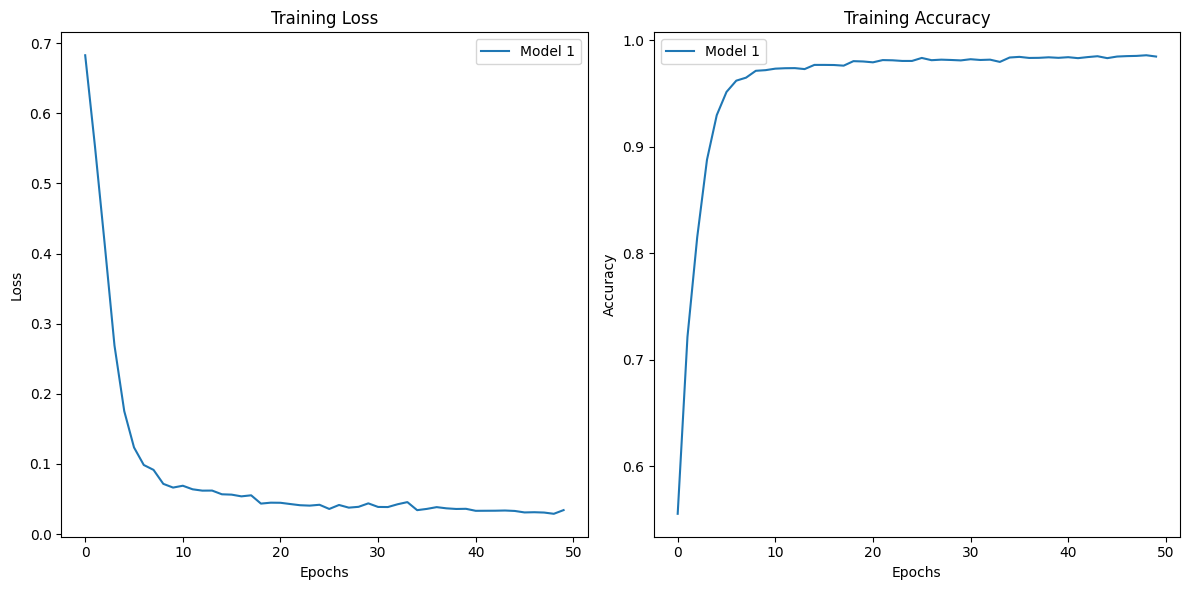

In [ ]:
models = []
history_list = []
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(max_words, 64, input_length=max_len),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Sử dụng Dropout với tỷ lệ 0.5
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
# Tạo optimizer với tốc độ học được điều chỉnh
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# Chọn mẫu thuộc nhãn 0 và không thuộc nhãn 0
X_train_label_0 = X_train_pad[y_train[:, 0] == 1]
y_train_label_0 = np.ones(len(X_train_label_0))  # Nhãn của mẫu thuộc nhãn 0 là 1
X_train_non_label_0 = X_train_pad[y_train[:, 0] == 0]

# Chỉ lấy một phần dữ liệu không thuộc nhãn 0 để cân bằng số lượng mẫu
X_train_non_label_0 = X_train_non_label_0[:len(X_train_label_0)]
y_train_non_label_0 = np.zeros(len(X_train_label_0))  # Nhãn của mẫu không thuộc nhãn 0 là 0

# Kết hợp dữ liệu thuộc nhãn 0 và không thuộc nhãn 0
X_train_combined_0 = np.concatenate((X_train_label_0, X_train_non_label_0))
y_train_combined_0 = np.concatenate((y_train_label_0, y_train_non_label_0))

# Shuffle dữ liệu huấn luyện
shuffle_indices = np.random.permutation(len(X_train_combined_0))
X_train_combined_0 = X_train_combined_0[shuffle_indices]
y_train_combined_0 = y_train_combined_0[shuffle_indices]

# Huấn luyện mô hình
history = model.fit(X_train_combined_0, y_train_combined_0, epochs=50, batch_size=100, verbose=0)
history_list.append(history)

models.append(model)

# Vẽ biểu đồ huấn luyện
plt.figure(figsize=(12, 6))

# Biểu đồ loss
plt.subplot(1, 2, 1)
for i, history in enumerate(history_list):
    plt.plot(history.history['loss'], label=f'Model {i+1}')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ accuracy
plt.subplot(1, 2, 2)
for i, history in enumerate(history_list):
    plt.plot(history.history['accuracy'], label=f'Model {i+1}')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_pad)

# Làm tròn dự đoán về 0 hoặc 1 dựa trên ngưỡng 0.5
y_pred_rounded = np.round(y_pred)

# Lấy cột thứ 0 nếu bằng 1
y_test_label_0 = y_test[:, 0]

# Tính toán số lượng dự đoán đúng là nhãn 0
# correct_predictions = np.sum((y_pred_rounded == y_test_label_0))
correct_predictions = 0
for i in range(len(y_pred_rounded)):
  if y_pred_rounded[i][0] == y_test_label_0[i]:
    correct_predictions +=1

# Tính độ chính xác
accuracy = correct_predictions / len(y_test_label_0)
print("Accuracy:", accuracy)


114/114 [==============================] - 0s 3ms/step
Accuracy: 0.688588007736944


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Chuyển đổi dự đoán và nhãn thực tế về dạng nhãn nhị phân
y_pred_binary = y_pred_rounded.astype(int)

# Tính precision và recall
precision = precision_score(y_test_label_0, y_pred_binary)
recall = recall_score(y_test_label_0, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.5345794392523364
Recall: 0.6930533117932148


In [ ]:
import pickle

# Lưu mô hình vào file pickle
with open('mlp_model_2.pkl', 'wb') as file:
    pickle.dump(model, file)

# Đọc mô hình từ file pickle
with open('mlp_model_2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Sử dụng mô hình đã nạp để dự đoán
predictions = loaded_model.predict(X_test_pad)


75/75 [==============================] - 1s 7ms/step


# Cho model thứ 2

In [ ]:
data["Label"]

0         0
1        10
2         3
3        20
4         0
         ..
18095     1
18096     3
18097     9
18098     6
18099    15
Name: Label, Length: 18091, dtype: int64

Epoch 1/20
298/298 [==============================] - 7s 13ms/step - loss: 0.1583 - accuracy: 0.1041
Epoch 2/20
298/298 [==============================] - 6s 20ms/step - loss: 0.1282 - accuracy: 0.1557
Epoch 3/20
298/298 [==============================] - 4s 13ms/step - loss: 0.1148 - accuracy: 0.2458
Epoch 4/20
298/298 [==============================] - 4s 13ms/step - loss: 0.0971 - accuracy: 0.3706
Epoch 5/20
298/298 [==============================] - 5s 16ms/step - loss: 0.0776 - accuracy: 0.5197
Epoch 6/20
298/298 [==============================] - 4s 13ms/step - loss: 0.0585 - accuracy: 0.6575
Epoch 7/20
298/298 [==============================] - 4s 13ms/step - loss: 0.0427 - accuracy: 0.7644
Epoch 8/20
298/298 [==============================] - 5s 16ms/step - loss: 0.0307 - accuracy: 0.8453
Epoch 9/20
298/298 [==============================] - 4s 13ms/step - loss: 0.0223 - accuracy: 0.8952
Epoch 10/20
298/298 [==============================] - 4s 12ms/step - loss: 0.0162 - accura

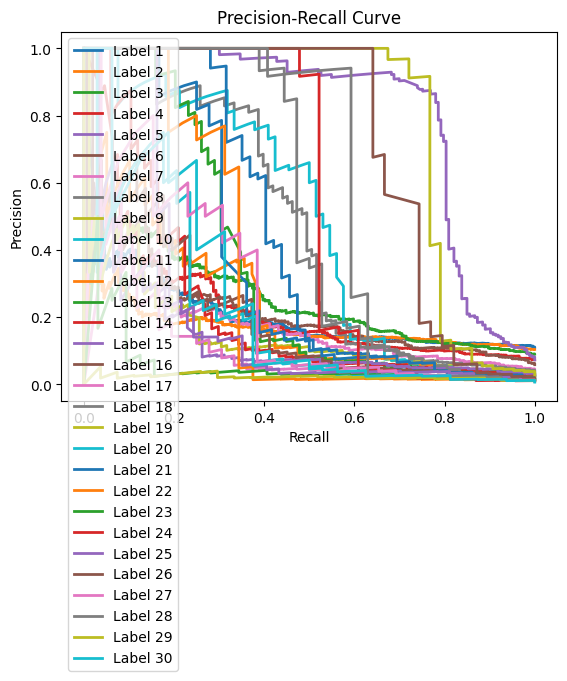

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import numpy as np

# Xử lý dữ liệu
X = data["Descr"]  # Mô tả làm đặc trưng đầu vào
y = data["Label"]  # Nhãn là nhãn đầu ra

# Loại bỏ các mẫu có nhãn 0
X = X[y != 0]
y = y[y != 0]

# Chuyển đổi nhãn thành dạng nhãn nhị phân
mlb = MultiLabelBinarizer(classes=np.arange(1, 31))  # Điều chỉnh classes từ 1 đến 30
y_binary = mlb.fit_transform([[label] for label in y])

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Tokenize và chuyển đổi văn bản thành sequences
max_words = 1000  # Số lượng từ tối đa trong từ điển
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences để có cùng độ dài
max_len = 100  # Độ dài tối đa của mỗi mô tả
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Xây dựng và huấn luyện mô hình MLP cho 30 nhãn
model = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(50, activation='relu'),
    Dense(40, activation='relu'),
    Dense(30, activation='sigmoid')  # Số lượng units của output layer là 30
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_pad, y_train, epochs=20, batch_size=32, verbose=1)

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)


# Vẽ đồ thị Precision và Recall cho từng nhãn
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_pad)

# Vẽ đồ thị Precision và Recall cho từng nhãn
precision = dict()
recall = dict()
for i in range(30):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Label {}'.format(i+1))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
correct_predictions

6726317

In [ ]:
len(y_pred_rounded)

3619

In [ ]:
y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
models = []
for i in range(31):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(max_words, 64, input_length=max_len),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    X_train_label_i = X_train_pad[y_train[:, i] == 1]
    y_train_label_i = y_train[y_train[:, i] == 1][:, i]
    X_train_non_label_i = X_train_pad[y_train[:, i] == 0]

    if i == 0:
        # Train model 0
        model.fit(X_train_label_i, np.ones_like(y_train_label_i), epochs=10, batch_size=32, verbose=0)
        models.append(model)
    else:
        # Train model i based on the instances where model 0 predicts non-label 0
        non_label_0_indices = np.where(y_pred_binary[:, 0] == 0)[0]
        X_train_non_label_0 = X_test_pad[non_label_0_indices]
        y_train_non_label_0 = y_test[non_label_0_indices]

        X_train_balanced = np.concatenate((X_train_label_i, X_train_non_label_0[:len(X_train_label_i)]))
        y_train_balanced = np.concatenate((np.ones_like(y_train_label_i), np.zeros(len(X_train_label_i))))

        # Shuffle dữ liệu huấn luyện
        shuffle_indices = np.random.permutation(len(X_train_balanced))
        X_train_balanced = X_train_balanced[shuffle_indices]
        y_train_balanced = y_train_balanced[shuffle_indices]

        # Huấn luyện mô hình
        model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32, verbose=0)
        models.append(model)

# Dự đoán trên tập kiểm tra
y_pred = np.array([model.predict(X_test_pad) for model in models]).squeeze().T
y_pred_binary = np.round(y_pred)

# Đánh giá hiệu suất của mô hình
print(classification_report(y_test, y_pred_binary, target_names=[str(i) for i in range(31)]))


In [ ]:

import numpy as np
from sklearn.model_selection import KFold
from sklearn.base import clone
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from stacking_model import build_meta_model
from base_models import lgbm2_load_model, lgbm_load_model, rf_load_model, xgb_load_model
le = LabelEncoder()
import numpy as np
np.int = int

def num_base_model(check_cases):
    """ Hàm này check xem có bao nhiêu model được cho vào các case cụ thể để có thể train cho từng model"""
    num_model = []

    if check_cases["rf"].values[0] == 1:
      num_model.append(1)
    # Nếu là mddel xgb thì trả về xgb
    if check_cases["xgb"].values[0] == 1:
      num_model.append(2)
    # Nếu là model lgbm1 thì trả về lgbm1
    if check_cases["lgb1"].values[0] == 1:
      num_model.append(3)
    # Nếu là model lgbm2 thì trả về lgbm2
    if check_cases["lgb2"].values[0] == 1:
      num_model.append(4)

    return num_model

def load_base(num_index, data_forex, parameters):
    """Hàm này dùng để load các base model vựa trên chỉ số index của các model
    1. Rf
    2. xgb
    3. lgbm1
    4. lgbm2
     Trả về các model đã được training
    """
    if num_index == 1:
      rf = rf_load_model(data_forex,parameters)
      return  rf

    # Nếu là mddel xgb thì trả về xgb
    if num_index == 2:
      xgb = xgb_load_model(data_forex,parameters)
      return xgb

    # Nếu là model lgbm1 thì trả về lgbm1
    if num_index == 3:
      lgbm1 = lgbm_load_model(data_forex,parameters)
      return lgbm1

    # Nếu là model lgbm2 thì trả về lgbm2
    if num_index == 4:
      lgbm2 = lgbm2_load_model(data_forex,parameters)
      return lgbm2

def create_meta_feature_target_model(data_forex,parameters, check_cases):
  """
    Xây dựng các features và target cho mô hình meta dựa trên dữ liệu và thông số cho trước.

    Parameters:
    - data_forex (list): Dữ liệu gồm features và target.
    - parameters (dict): Thông số cần thiết cho việc xây dựng các mô hình cơ sở.
    - check_cases (DataFrame): Bảng chứa các cờ chỉ định loại mô hình cần xây dựng.

    Returns:
    - meta_model: Mô hình meta đã được xây dựng.
    - base_models (list): Danh sách các mô hình cơ sở đã được huấn luyện.
    """


  # Check cac mo hinh co so

  num_model =  num_base_model(check_cases)


  # Trường hợp là dùng đơn model
  # Thì ta duyệt từng case của model và trả về model đơn đó
  if len(num_model) ==1 :
    model = load_base(num_model[0], data_forex, parameters)
    pred = model.predict(X_test)

  if isinstance(model, XGBClassifier):
    le.fit_transform(data_forex[1])
    pred = le.inverse_transform(pred)
    # Xóa những thứ không càn thiets dữ lại pred
    del model
    del y_train_index
    del num_model
    # Trả vê dự đoán đã được chuyển đổi của model
    return pred


  kfold = KFold(n_splits=3, shuffle=True, random_state=42)
  # Đoạn code này lấy ra dữ liệu để train và test
  X_train = data_forex[0]
  meta_features = np.zeros((X_train.shape[0], len(num_model)))
  meta_target = np.zeros(X_train.shape[0])
  y_train = data_forex[1]

  meta_test = np.zeros((data_forex[2].shape[0], len(num_model)))
  # Taoj meta_features va meta target


  for i in range(len(num_model)):
    # Lấy dữ liệu dự đoán từ các model
    instance = load_base(num_model[i], data_forex, parameters)
    pred_base = instance.predict(data_forex[2])
    if isinstance(instance, XGBClassifier):
      le.fit_transform(data_forex[2])
      pred = le.inverse_transform(pred_base)
    else:
      meta_test[:,i] = pred
    # Ta sẽ có dư liệu dự đoán của tạp test lúc chưa thay đổi về mô hình

    for train_index, holdout_index in kfold.split(X_train, y_train):

        # Clone model để không làm thay đổi model gốc
        instance_copy = clone(instance)

        if isinstance(instance_copy, XGBClassifier):
            y_train_index = le.fit_transform(y_train.copy().iloc[train_index])
        else:
            y_train_index = y_train.copy().iloc[train_index]
        # Huấn luyện mỗi base model trên phần train của fold
        instance_copy.fit(X_train.iloc[train_index], y_train_index)

        # Dự đoán trên phần hold-out và lưu vào meta_features

        y_pred = instance_copy.predict(X_train.iloc[holdout_index])
        if isinstance(instance_copy, XGBClassifier):
            y_pred = le.inverse_transform(y_pred)
        meta_features[holdout_index, i] = y_pred

        del instance_copy
        del y_train_index

    del instance

  meta_target = y_train

  model = build_meta_model(meta_features, meta_target, check_cases)
  predict = model.predict(meta_test)

  if isinstance(model, CatBoostClassifier):
      return predict.flatten()

  del model
  del meta_target
  del meta_features
  del num_model
  del X_train
  del y_train

  return predict




ModuleNotFoundError: No module named 'stacking_model'

In [ ]:
from catboost import CatBoostClassifier
import numpy as np
from sklearn.calibration import LabelEncoder
from xgboost import XGBClassifier

import gc

from estimators_model.build_meta import create_meta_feature_target_model
from get_info_data import get_info_symbol
from estimators_model.load_model import  create_meta_feature_target_model_load_model
def predict_signal(model, base_models, X_test, le):
    """
    Dự đoán tín hiệu sử dụng mô hình meta.

    Parameters:
    - model: Mô hình meta đã được huấn luyện.
    - base_models (list): Danh sách các mô hình cơ sở.
    - X_test (DataFrame): Dữ liệu kiểm tra.
    - le: LabelEncoder để chuyển đổi dự đoán của XGBClassifier.

    Returns:
    - pred_meta: Dự đoán của mô hình meta cho dữ liệu kiểm tra.
    """
    print(model)
    if model  == None:
      pred = base_models[0].predict(X_test)
      print(pred)
      return pred

    # Khởi tạo mảng meta_test với kích thước phù hợp
    meta_test = np.zeros((X_test.shape[0], len(base_models)))

    # Lặp qua từng mô hình cơ sở để dự đoán
    for i, estimator in enumerate(base_models):
        pred = estimator.predict(X_test)

        # Nếu mô hình là XGBClassifier, chuyển đổi dự đoán ngược lại
        if isinstance(estimator, XGBClassifier):
            pred = le.inverse_transform(pred)

        # Lưu dự đoán vào mảng meta_test
        meta_test[:, i] = pred


    # Dự đoán trên meta_test bằng mô hình meta
    pred_meta = model.predict(meta_test)
    print(pred_meta)
    if isinstance(model, CatBoostClassifier):

      return pred_meta.flatten()

    # Giải phóng bộ nhớ
    del base_models
    del model

    return pred_meta


def get_signal(symbol):
    """
    Lấy dự đoán tín hiệu cho một biểu tượng (symbol) cụ thể.

    Parameters:
    - symbol (str): Biểu tượng cần dự đoán.

    Returns:
    - pred: Dự đoán tín hiệu cho biểu tượng.
    """

    le = LabelEncoder()

    # Lấy thông tin về biểu tượng, dữ liệu, thông số và mô hình
    data_forex, df_case, parameter, data = get_info_symbol(symbol)
    model, base_models = create_meta_feature_target_model_load_model(data_forex, parameter, df_case)

    # Chuyển đổi nhãn thành số
    le.fit_transform(data_forex[1])

    # Dự đoán tín hiệu và giải phóng bộ nhớ
    X_test = data_forex[2]
    pred = predict_signal(model, base_models, X_test, le)
    del model
    del base_models
    gc.collect()

    return pred

# symbols = [
#     "EURCHF", "EURNZD", "CHFJPY", "EURGBP", "EURCAD", "GBPUSD",
#     "GBPAUD", "AUDUSD", "USDCAD", "CADCHF", "USDCHF", "GBPJPY",
#     "USDJPY", "AUDNZD", "CADJPY"
# ]

# for sym in symbols:
#   pred = get_signal(sym)
#   print(pred)
# # print(pred)